In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 1

In [51]:
df=pd.read_csv('/content/drive/MyDrive/A2Data_train.csv',header=None)
dataset=df.to_numpy()

In [52]:
X=dataset[:,:-1]
Y=dataset[:,-1]

In [53]:
n=Y.shape[0]

Part 1

In [54]:
w_ml=np.linalg.inv(X.T@X)@(X.T)@Y  #closed form solution

In [55]:
w_ml

array([-7.84961009e-03, -1.36715320e-02, -3.61656438e-03,  2.64909160e-03,
        1.88551446e-01,  2.65314657e-03,  9.46531786e-03,  1.79809481e-01,
        3.73757317e-03,  4.99608944e-01,  8.35836265e-03,  4.29108775e-03,
        1.42141179e-02,  3.94232414e-03,  9.36795890e-03, -1.12038274e-03,
        3.35727500e-03,  1.16152212e-03, -9.40884707e-03, -2.45575476e-03,
       -1.17409629e-02, -1.01960612e-02,  7.95771321e-03, -1.00574854e-02,
        6.04882939e-03, -4.67345192e-03, -3.09091547e-03,  8.14909193e-03,
        1.20264599e-02, -6.82458163e-03, -8.65405539e-03,  9.86273479e-04,
        4.92968011e-03,  5.99772461e-03, -1.34667860e-02,  1.07075729e-03,
        1.32745992e-02, -1.14148742e-02, -2.01056697e-02,  5.85096240e-01,
        4.94483247e-04, -7.86666920e-04, -2.71926574e-03, -9.54021938e-03,
       -5.44161058e-03,  9.80679209e-03, -6.72540624e-03, -4.45414276e-04,
        6.98516508e-03,  3.16138907e-02,  4.51763485e-01, -8.75221380e-03,
        2.55167390e-03,  

In [36]:
def gradient(w):
  grad=2*(X.T@X@w-X.T@Y)*(1/n)
  return grad

In [37]:
def RMSE(w):
  mse=np.dot(w-w_ml,w-w_ml)
  return np.sqrt(mse)

Part 2

In [ ]:
alpha=3e-2
T=1000
w=np.random.randn(w_ml.shape[0])
error_his_gd=[]
error_his_gd.append(RMSE(w))
for t in range(T):
  grad=gradient(w)
  w=w-alpha*grad
  error_his_gd.append(RMSE(w))
  

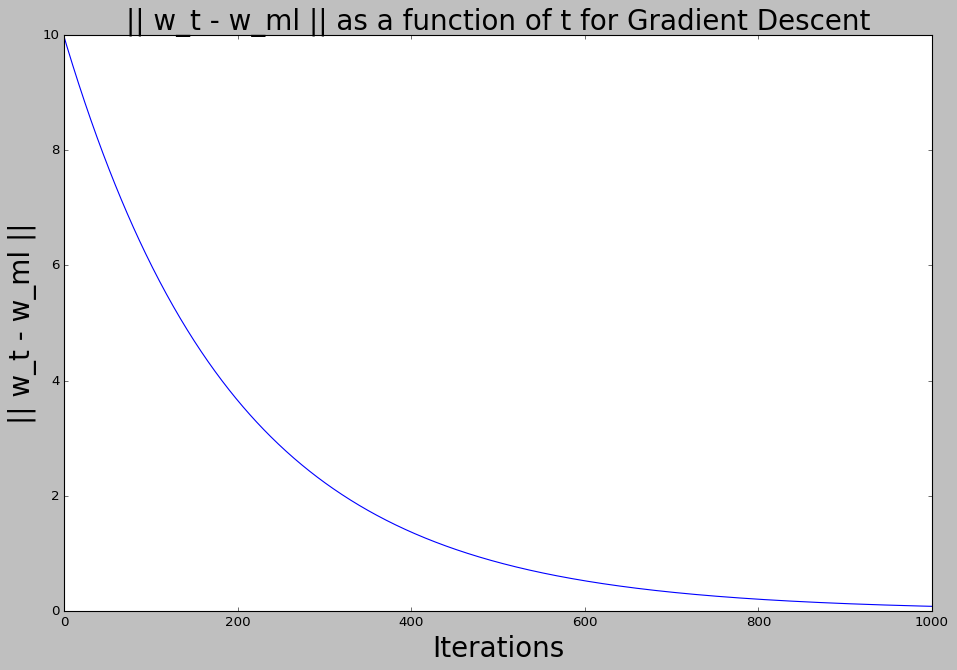

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(14,9))
plt.plot(np.arange(T+1),error_his_gd)
plt.xlabel('Iterations',fontsize=25)
plt.ylabel('|| w_t - w_ml ||',fontsize=25)
plt.title('|| w_t - w_ml || as a function of t for Gradient Descent',fontsize=25)
plt.show()

Part 3

In [ ]:
batch_size=100
def SGD(w):
  index=np.random.choice(n,replace=False,size=batch_size)
  X_=X[index,:]
  Y_=Y[index]
  grad=2*(X_.T@X_@w-X_.T@Y_)*(1/batch_size)
  return grad

In [ ]:
alpha=3e-2
T=1000
w=np.random.randn(w_ml.shape[0])
error_his_sgd=[]
error_his_sgd.append(RMSE(w))
for t in range(T):
  grad=SGD(w)
  w=w-alpha*grad
  error_his_sgd.append(RMSE(w))
  

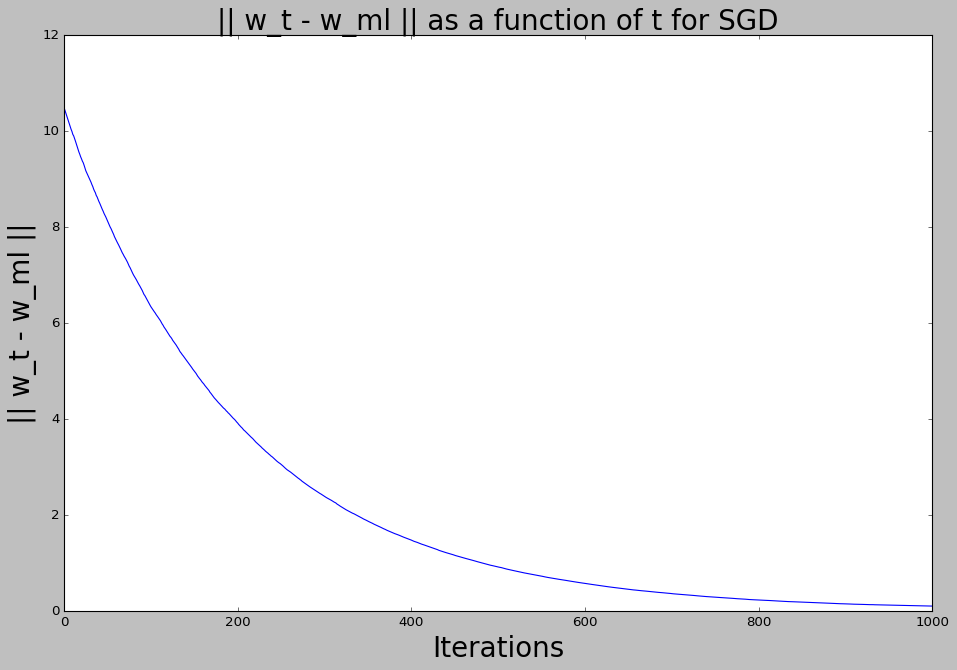

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(14,9))
plt.plot(np.arange(T+1),error_his_sgd)
plt.xlabel('Iterations',fontsize=25)
plt.ylabel('|| w_t - w_ml ||',fontsize=25)
plt.title('|| w_t - w_ml || as a function of t for SGD',fontsize=25)
plt.show()

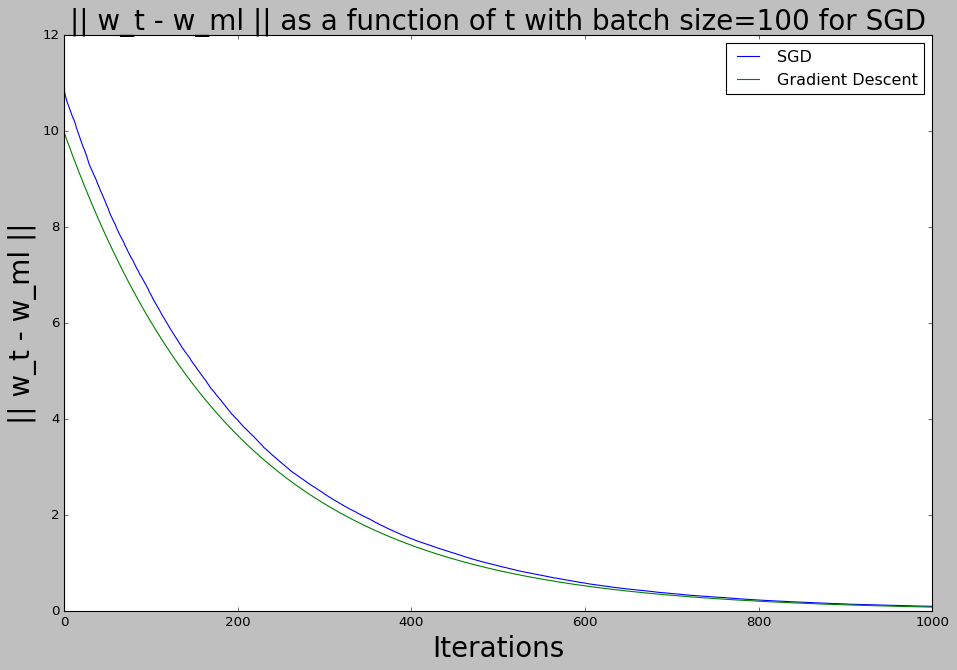

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(14,9))
plt.plot(np.arange(T+1),error_his_sgd,label='SGD')
plt.plot(np.arange(T+1),error_his_gd,label='Gradient Descent')
plt.xlabel('Iterations',fontsize=25)
plt.ylabel('|| w_t - w_ml ||',fontsize=25)
plt.title('|| w_t - w_ml || as a function of t with batch size=100 for SGD',fontsize=25)
plt.legend()
plt.show()

In [ ]:
batch_size=2
alpha=3e-2
T=1000
w=np.random.randn(w_ml.shape[0])
error_his_sgd=[]
error_his_sgd.append(RMSE(w))
for t in range(T):
  grad=SGD(w)
  w=w-alpha*grad
  error_his_sgd.append(RMSE(w))

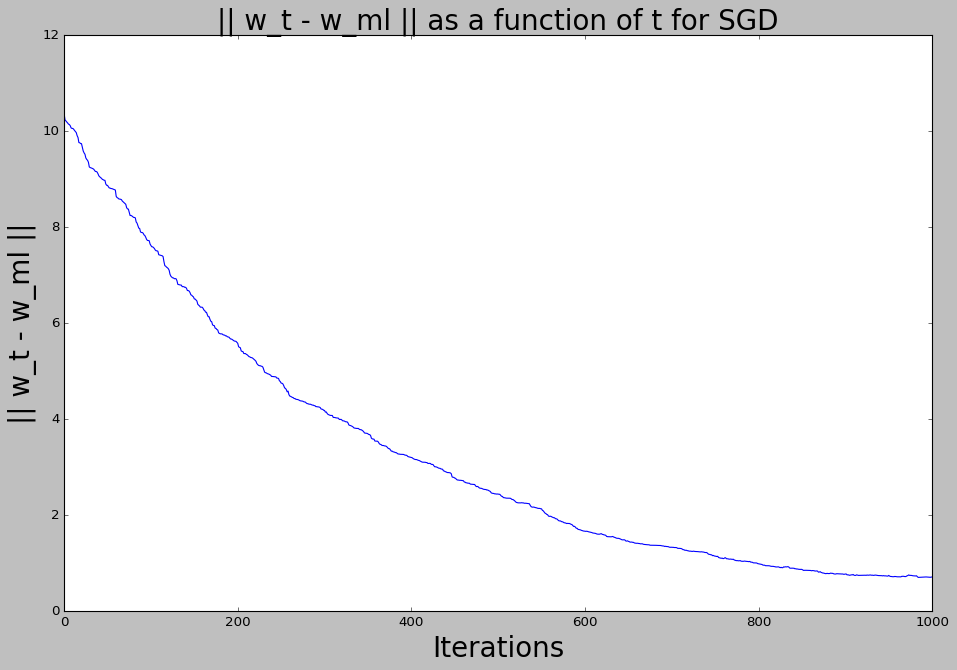

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(14,9))
plt.plot(np.arange(T+1),error_his_sgd)
plt.xlabel('Iterations',fontsize=25)
plt.ylabel('|| w_t - w_ml ||',fontsize=25)
plt.title('|| w_t - w_ml || as a function of t for SGD',fontsize=25)
plt.show()

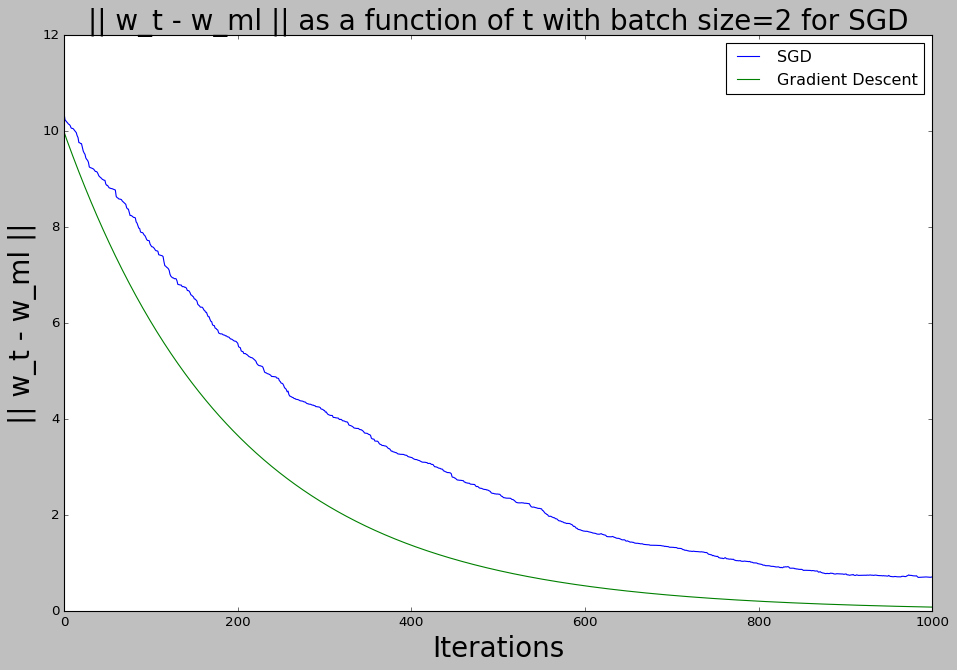

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(14,9))
plt.plot(np.arange(T+1),error_his_sgd,label='SGD')
plt.plot(np.arange(T+1),error_his_gd,label='Gradient Descent')
plt.xlabel('Iterations',fontsize=25)
plt.ylabel('|| w_t - w_ml ||',fontsize=25)
plt.title('|| w_t - w_ml || as a function of t with batch size=2 for SGD',fontsize=25)
plt.legend()
plt.show()

Question 2

In [19]:
def ridge_regression(w,lamda,X_,Y_):
  n_=Y_.shape[0]
  grad=2*(X_.T@X_@w-X_.T@Y_)*(1/n_) + 2*lamda*w
  return grad

Part 1 and Part 2

In [38]:
lm_list=[0.01,0.1,1,10,100]
val_size=2000

T=1000
alpha=1e-3
error_lm=[]
for lamda in lm_list:
  ls=[]
  i=0
  while(i+val_size<=n):
    train_index=np.concatenate((np.arange(i),np.arange(i+val_size,n)))
    X_train=X[train_index,:]
    X_val=X[i:i+val_size,:]
    Y_train=Y[train_index]
    Y_val=Y[i:i+val_size]
    w=np.random.randn(w_ml.shape[0])
    ls2=[]
    for t in range(T):
      grad=ridge_regression(w,lamda,X_train,Y_train)
      w=w-alpha*grad
      Y_hat=X_val@w
      error=np.dot(Y_hat-Y_val,Y_hat-Y_val)*(1/Y_val.shape[0])
      ls2.append(error)
    ls.append(ls2)
    i=i+val_size  
  error_lm.append(np.array(ls).mean(axis=0))

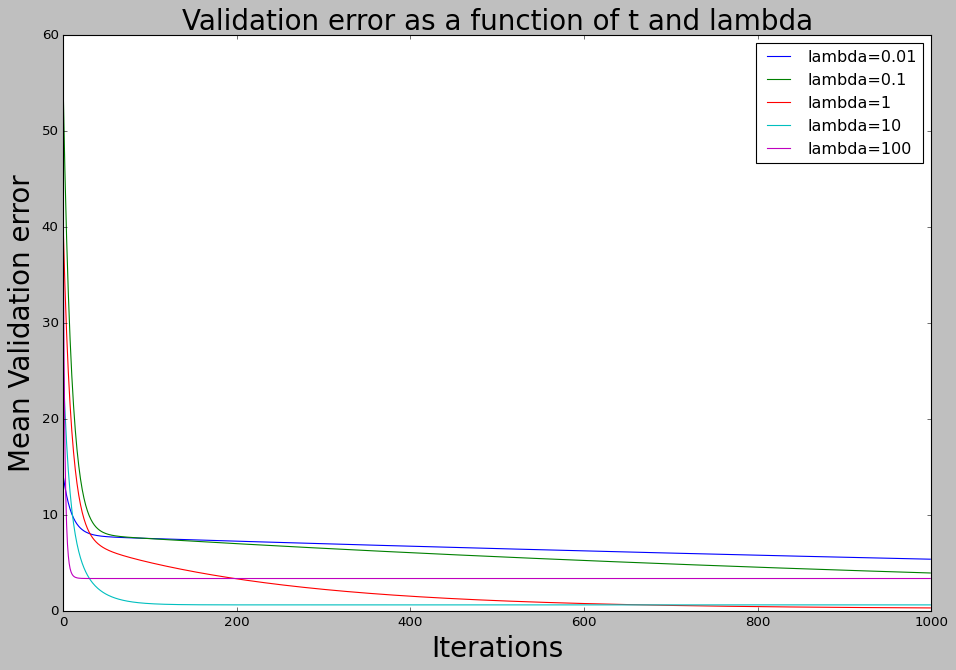

In [39]:
plt.style.use('classic')
plt.figure(figsize=(14,9))
plt.plot(np.arange(T),error_lm[0],label='lambda=0.01')
plt.plot(np.arange(T),error_lm[1],label='lambda=0.1')
plt.plot(np.arange(T),error_lm[2],label='lambda=1')
plt.plot(np.arange(T),error_lm[3],label='lambda=10')
plt.plot(np.arange(T),error_lm[4],label='lambda=100')
plt.xlabel('Iterations',fontsize=25)
plt.ylabel('Mean Validation error',fontsize=25)
plt.title('Validation error as a function of t and lambda',fontsize=25)
plt.legend()
plt.show()

In [41]:
error_lm=np.array(error_lm)
error_lm[:,-1]  #  The validation error for different lambda values at the end of training

array([5.39622278, 3.96015787, 0.32030762, 0.63658711, 3.38388932])

In [57]:
lamda=1 # best choice of lamda from the previous graph
dim=X.shape[1]
w_R=np.linalg.inv(X.T@X+lamda*np.identity(dim))@X.T@Y

In [58]:
df=pd.read_csv('/content/drive/MyDrive/A2Data_test.csv',header=None)
dataset_test=df.to_numpy()
X_test=dataset_test[:,:-1]
Y_test=dataset_test[:,-1]
n_test=Y_test.shape[0]

In [59]:
Y_hat_R=X_test@w_R
error_R=np.dot(Y_hat_R-Y_test,Y_hat_R-Y_test)*(1/n_test)

In [60]:
Y_hat_ml=X_test@w_ml
error_ml=np.dot(Y_hat_ml-Y_test,Y_hat_ml-Y_test)*(1/n_test)

In [61]:
print('Test error for the ridge estimate= ',error_R,' and for the maximum likelihood estimate= ',error_ml)

Test error for the ridge estimate=  0.3703039794569779  and for the maximum likelihood estimate=  0.37072731116978747
